**Luciano Pinheiro Batista 173096**

Para a atividade foram utilizadas algumas funções prontas da biblioteca ScikitLearn, já que algumas delas demandariam uma complexidade razoavelmente grande para serem feitas do zero.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Os conjuntos de imagens de treino, teste e validação foram carregados e normalizados. Em seguida as imagens, que são compostas de 3 canais de cor, foram redimensionadas com o objetivo de servirem como entrada para a rede neural MLP.

In [2]:
Train_Images = np.load('train_images.npy')/255
Train_Labels = np.load('train_labels.npy')

Val_Images = np.load('val_images.npy')/255
Val_Labels = np.load('val_labels.npy')

Test_Images = np.load('test_images.npy')/255
Test_Labels = np.load('test_labels.npy')

Train_Images = np.reshape(Train_Images, (len(Train_Images), 28*28*3))
Train_Labels = np.reshape(Train_Labels, len(Train_Labels))

Val_Images = np.reshape(Val_Images, (len(Val_Images), 28*28*3))
Val_Labels = np.reshape(Val_Labels, len(Val_Labels))

Test_Images = np.reshape(Test_Images, (len(Test_Images), 28*28*3))
Test_Labels = np.reshape(Test_Labels, len(Test_Labels))


In [4]:
print(Train_Labels)

[7 3 6 ... 1 6 4]


A primeira rede neural consistiu de apenas uma camada intermediária e foi configurada da seguinte maneira: o número de neurônios da camada foi aumentado 1 a até 100, de 10 em 10. O algoritmo de otimização utilizado foi o *Adam*, que se adequa a datasets relativamente grandes. A função de ativação utilizada foi a *Relu*, que possui um melhor custo benefício entre eficiência no ajuste de pesos e desempenho de aproximação. As funções sigmoidais demoraram mais tempo para convergir a medida em que o número de neurônios aumentava. A acurácia obtida juntamente com o conjunto de validação foi calculada para cada configuração da rede neural e o gráfico de acurácia em função de número de neurônios foi gerado.

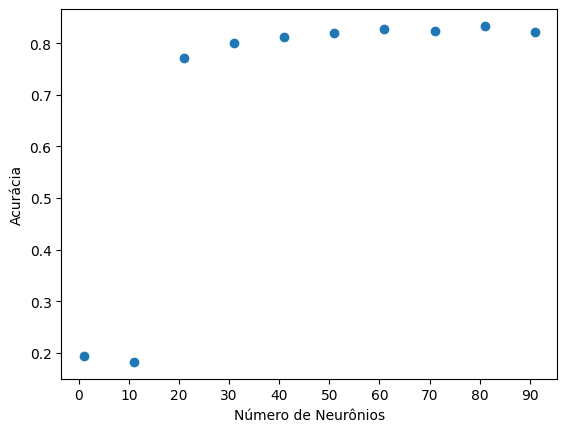

In [11]:
#Treinamento e Validação
Num_Neuronios = np.arange(1, 100, 10)
Acuracias = []

for Numero in Num_Neuronios:
    
    Neuronio_1 = MLPClassifier(hidden_layer_sizes = (Numero),
                       max_iter = 50,
                       tol = 0.01,
                       learning_rate_init = .001,
                       solver = "adam",
                       activation = "relu",
                       learning_rate = "constant",
                      )

    Neuronio_1.fit(Train_Images, Train_Labels) 
    
    Pred_1 = Neuronio_1.predict(Val_Images)
    
    
    Acuracias.append(accuracy_score(Val_Labels, Pred_1))
    
    
fig, ax = plt.subplots()
ax.scatter(Num_Neuronios, Acuracias)
ax.set_xlabel('Número de Neurônios')
ax.set_ylabel('Acurácia')
plt.locator_params ('x', nbins = len(Num_Neuronios))
plt.show()
    

Para a etapa de teste da primeira rede neural foram utilizados 41 neurônios. Observando o gráfico, há relativamente pouca melhora da acurácia ao se aumentar ainda mais o número de neuronios, o que implicaria também em mais parâmetros para serem ajustados e um maior esforço computacional.

In [22]:
#Teste
Neuronio_1 = MLPClassifier(hidden_layer_sizes = (41),
                       max_iter = 50,
                       tol = 0.01,
                       learning_rate_init = .001,
                       solver = "adam",
                       activation = "relu",
                       learning_rate = "constant",
                      )

Neuronio_1.fit(Train_Images, Train_Labels) 

Pred_1 = Neuronio_1.predict(Test_Images)

#Acurácia
print("Acurácia MLP 1 camada:", accuracy_score(Test_Labels, Pred_1))

#Matriz de Confusão
mc_1 = confusion_matrix(Test_Labels, Pred_1, labels=[0, 1, 2, 3, 4, 5, 6, 7])
Formata_Matriz(mc_1)

Acurácia MLP 1 camada: 0.7930429698918445


,Basófilos,Eosinófilos,Eritroblastos,Granulócitos Imaturos,Linfócitos,Monócitos,Neutrófilos,Plaquetas
Basófilos,139,5,0,74,5,20,1,0
Eosinófilos,2,592,0,13,1,3,13,0
Eritroblastos,5,0,237,27,6,3,20,13
Granulócitos Imaturos,27,28,8,429,9,50,27,1
Linfócitos,12,1,21,35,166,1,7,0
Monócitos,6,7,1,135,1,128,6,0
Neutrófilos,0,28,19,45,2,10,560,2
Plaquetas,0,0,5,0,0,0,3,462


A segunda rede neural foi construída de maneira similar a primeira, com os neurônios aumentado de 1 até 100 a passos de 10. Por questão de simplicidade os mesmos números de neurônios foram utilizados em cada iteração. Um novo gráfico de acurácia por número de neurônios foi, então, gerado. É interessante pontuar que para a segunda rede foi possível obter uma melhor acurácia com menos neurônios por camada em comparação à primeira.

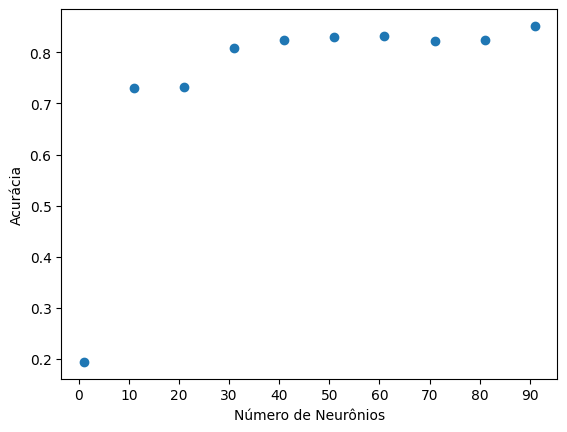

In [24]:
#Treinamento e Validação

Num_Neuronios = np.arange(1, 100, 10)
Acuracias = []

for Numero in Num_Neuronios:
    
    Neuronio_2 = MLPClassifier(hidden_layer_sizes = (Numero, Numero),
                       max_iter = 50,
                       tol = 0.01,
                       learning_rate_init = .001,
                       solver = "adam",
                       activation = "relu",
                       learning_rate = "constant",
                      )

    Neuronio_2.fit(Train_Images, Train_Labels) 
    
    Pred_2 = Neuronio_2.predict(Val_Images)
    
    Acuracias.append(accuracy_score(Val_Labels, Pred_2))
    
    
fig, ax = plt.subplots()
ax.scatter(Num_Neuronios, Acuracias)
ax.set_xlabel('Número de Neurônios')
ax.set_ylabel('Acurácia')
plt.locator_params ('x', nbins = len(Num_Neuronios))
plt.show()


Para a etapa de teste da segunda rede neural foram utilizados na primeira e na segunda camada, 91 neurônios, que se mostrou o valor com a melhor acurácia obtida na etapa de validação.

In [27]:
#Teste
Neuronio_2 = MLPClassifier(hidden_layer_sizes = (91, 91),
                       max_iter = 50,
                       tol = 0.01,
                       learning_rate_init = .001,
                       solver = "adam",
                       activation = "relu",
                       learning_rate = "constant",
                      )

Neuronio_2.fit(Train_Images, Train_Labels) 

Pred_2 = Neuronio_2.predict(Test_Images)

#Acurácia
print("Acurácia MLP 2 camadas:", accuracy_score(Test_Labels, Pred_2))

#Matriz de Confusão
mc_2 = confusion_matrix(Test_Labels, Pred_2, labels=[0, 1, 2, 3, 4, 5, 6, 7])
Formata_Matriz(mc_2)

Acurácia MLP 2 camadas: 0.8427360420929553


,Basófilos,Eosinófilos,Eritroblastos,Granulócitos Imaturos,Linfócitos,Monócitos,Neutrófilos,Plaquetas
Basófilos,138,1,0,80,11,13,1,0
Eosinófilos,1,592,1,9,1,2,17,1
Eritroblastos,3,1,249,15,12,3,9,19
Granulócitos Imaturos,25,15,4,442,15,36,42,0
Linfócitos,4,0,9,26,199,2,3,0
Monócitos,5,0,1,89,3,184,2,0
Neutrófilos,0,12,11,23,2,2,610,6
Plaquetas,0,0,1,0,0,0,0,469


Houve um aumento de aproximadamente **5%** na acurácia na segunda rede neural em relação a primeira. Observando as matrizes de confusão, fica evidente que houve um aumento expressivo no acerto em relação a classe Monócitos: de 128 na primeira para 184 na segunda.

**Obs**: A função Formata_Matriz foi utilizada para formatar a matriz de confusão com o nome das células dos bancos de imagem.

In [19]:
def Formata_Matriz(mc):
    
    Colunas = {"Basófilos": mc[:, 0],
    "Eosinófilos": mc[:, 1] ,
    "Eritroblastos": mc[:, 2],
    "Granulócitos Imaturos": mc[:, 3],
    "Linfócitos": mc[:, 4],
    "Monócitos": mc[:, 5],
    "Neutrófilos": mc[:, 6],
    "Plaquetas": mc[:, 7]}
    Indice = ["Basófilos", "Eosinófilos", "Eritroblastos", "Granulócitos Imaturos", "Linfócitos", "Monócitos", "Neutrófilos", "Plaquetas"]
    mc_df = pd.DataFrame(Colunas, index = Indice)
    
    return mc_df
